# 논문의 아이디어를 활용한 연구

배경 : 

소개한 논문의 데이터는 연구자 개인이 구축한 것으로 해당 데이터 확보가 어려워 그대로 연구를 진행하기 어려웠기에 공공데이터를 사용하여 논문의 아이디어를 적용한 분석을 진행해 보았습니다.


소개 :

머신러닝을 활용하여 이상거래탐지모형을 구축하면서 시간데이터를 원자료, 가공자료 두 가지 형태로 나누어 비교분석함으로써 논문에서 이야기하고 있는 자료 가공의 중요성을 도출한 연구입니다.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt

# 데이터 및 기초통계량

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')
data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2['NormalizedAmount'] = scaler.fit_transform(data2['Amount'].values.reshape(-1, 1))

data2 = data2.drop(['Amount'], axis = 1)
y_2 = data2['Class']
X_2 = data2.drop(['Class'], axis = 1)

In [9]:
# 데이터 정보  

print('총 거래수 :',format(len(data2),','))
print('이상거래 개수 :',sum(data2['Class']==1))
print('이상거래 비율 :',str(round(sum(data2['Class']==1)/len(data2),3)*100)+'%')

총 거래수 : 284,807
이상거래 개수 : 492
이상거래 비율 : 0.2%


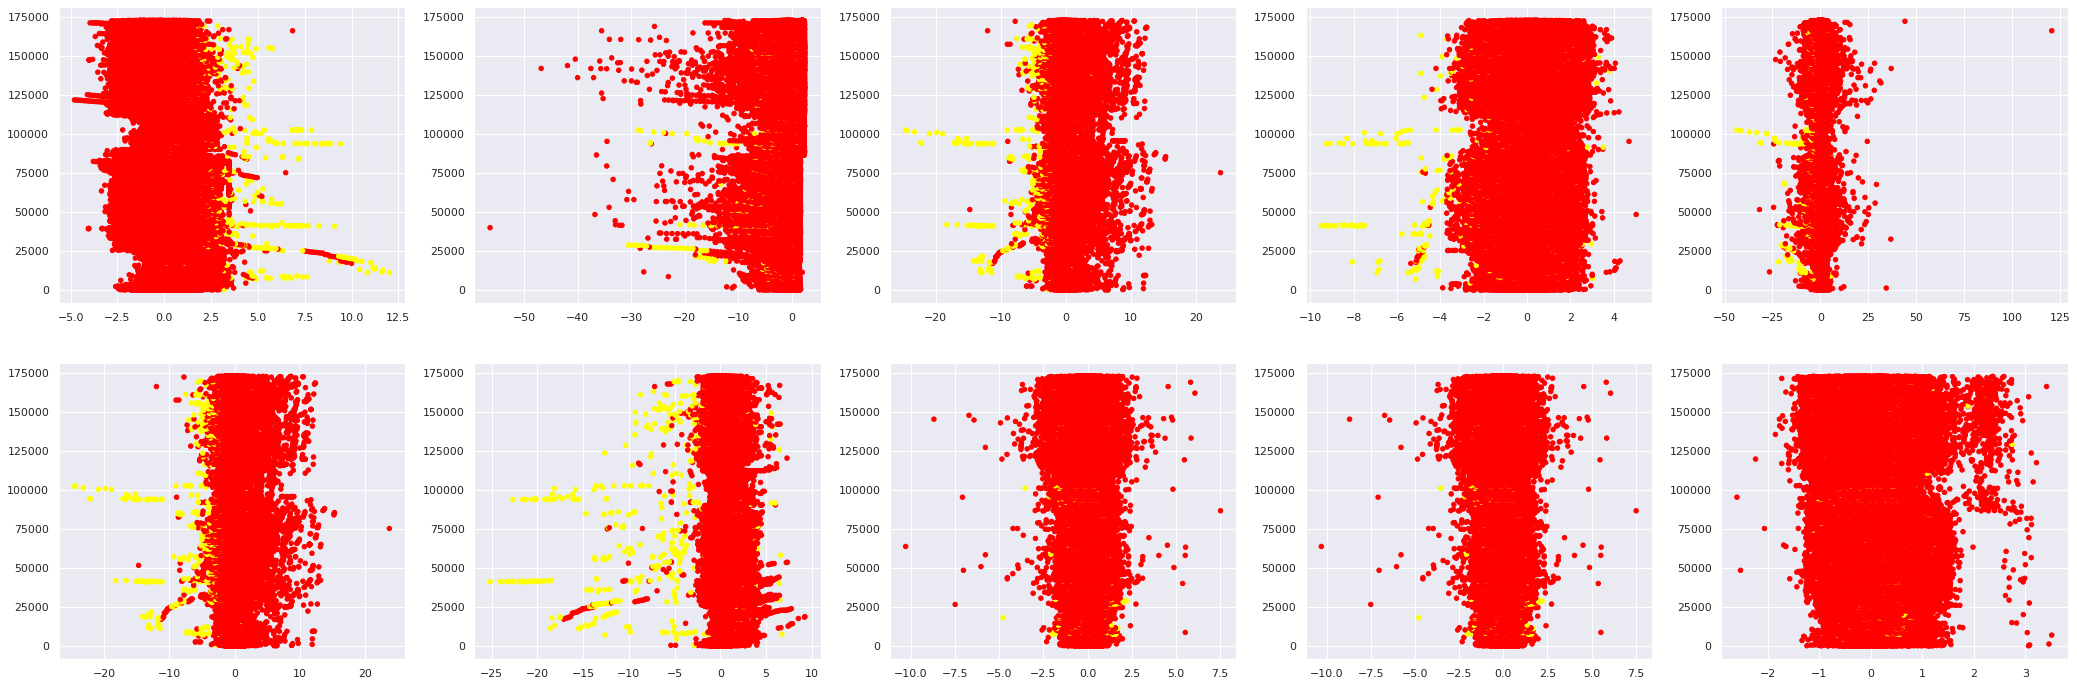

In [10]:
from itertools import product
from random  import randrange

comb2=list(product(data2.keys()[1:29],data2.keys()[0:1]))

sample2=list()
for i in [randrange(0,29) for i in range(0,10)] : 
  sample2.append(comb2[i])

fig, ax= plt.subplots(2,5, figsize=(36,12))
ax_n=list(product(range(0,2),range(0,5)))
n=0

for i, j in sample2 : 
  ax[ax_n[n][0]][ax_n[n][1]].scatter(X_2[i], X_2[j], c=y_2, s=20, cmap='autumn')  # 다른 색상을 이용하고 싶으시면 cmap='Blues'를 사용해 보세요
  n+=1

# 가공되지 않은 시간변수를 활용한 머신러닝

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Lambda, SimpleRNN, LSTM, Bidirectional, Conv1D, Dropout
from tensorflow.keras.layers import GRU, TimeDistributed, Activation
from sklearn.model_selection import train_test_split

# time feature 추가

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398


In [ ]:
# DNN

model = Sequential([
Dense(input_dim = 30, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'relu')])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 36, epochs = 5)

Epoch 1/5
5538/5538 [==============================] - 7s 1ms/step - loss: 0.0392 - accuracy: 0.9974
Epoch 2/5
5538/5538 [==============================] - 7s 1ms/step - loss: 0.0267 - accuracy: 0.9983
Epoch 3/5
5538/5538 [==============================] - 7s 1ms/step - loss: 0.0267 - accuracy: 0.9983
Epoch 4/5
5538/5538 [==============================] - 7s 1ms/step - loss: 0.0267 - accuracy: 0.9983
Epoch 5/5
5538/5538 [==============================] - 7s 1ms/step - loss: 0.0267 - accuracy: 0.9983


In [ ]:
score=model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 2s 878us/step - loss: 0.0265 - accuracy: 0.9983
[0.02653776854276657, 0.9982795715332031]


In [ ]:
# 결정트리

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(max_depth=3) # depth 조절 필요!  크게 기대x 데이터 특성상
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

In [ ]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100) # 의사결정트리 갯수 설정을 어떻게 해야하나?  큰의미 x 향후 연구방향
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# 모델별 정확도 비교

print('랜덤포레스트 :',sum(y_test==y_pred_rf)/len(y_test),
      '\n'+'DNN :', score[1],'\n'+
      '결정트리 :',sum(y_test==y_pred_dt)/len(y_test))  ##%소수 둘 쨰자리까지

# DNN은 단순히 피쳐를 추가한다고 결과가 달라지지 않는다.

랜덤포레스트 : 0.9995318516437859 
DNN : 0.9982795715332031 
결정트리 : 0.9992743700478681


In [ ]:
y_test_dnn=np.array(y_test).reshape(-1,1)
y_temp_dnn=y_test_dnn[model.predict(X_test)!=np.array(y_test).reshape(-1,1)]

In [ ]:
# 분석 요약

res1_list=[len(y_test[y_test!=i]) for i in [y_pred_dt, y_pred_rf]]
res1_list.append(len(y_temp_dnn))
res2_list=[sum(y_test[y_test!=i]==1) for i in [y_pred_dt, y_pred_rf]]
res2_list.append(len(y_temp_dnn==1))
res3_list=[round(sum(y_test[y_test!=i]==1)/len(y_test[y_test!=i]),4)*100for i in [y_pred_dt, y_pred_rf]]
res3_list.append(round(len(y_temp_dnn==1)/len(y_temp_dnn),4)*100)


res_difference=pd.DataFrame({'# of 예측 오차' : res1_list,'# of 오차 중 이상거래' : res2_list,'오차 중 이상거래 비율(%)' : res3_list}, index=['결정트리','랜덤포레스트','DNN'])
res_difference

,# of 예측 오차,# of 오차 중 이상거래,오차 중 이상거래 비율(%)
결정트리,62,39,62.9
랜덤포레스트,40,34,85.0
DNN,147,147,100.0


# 시간변수를 시차로 가공한 머신러닝


In [ ]:
# 단시간 내 연속 거래 자료 생성

data_test=data2
data_test['time_lag']=data2['Time']-data2['Time'].shift()
data_test=data_test.dropna()

data_test.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount', 'time_lag'],
      dtype='object')

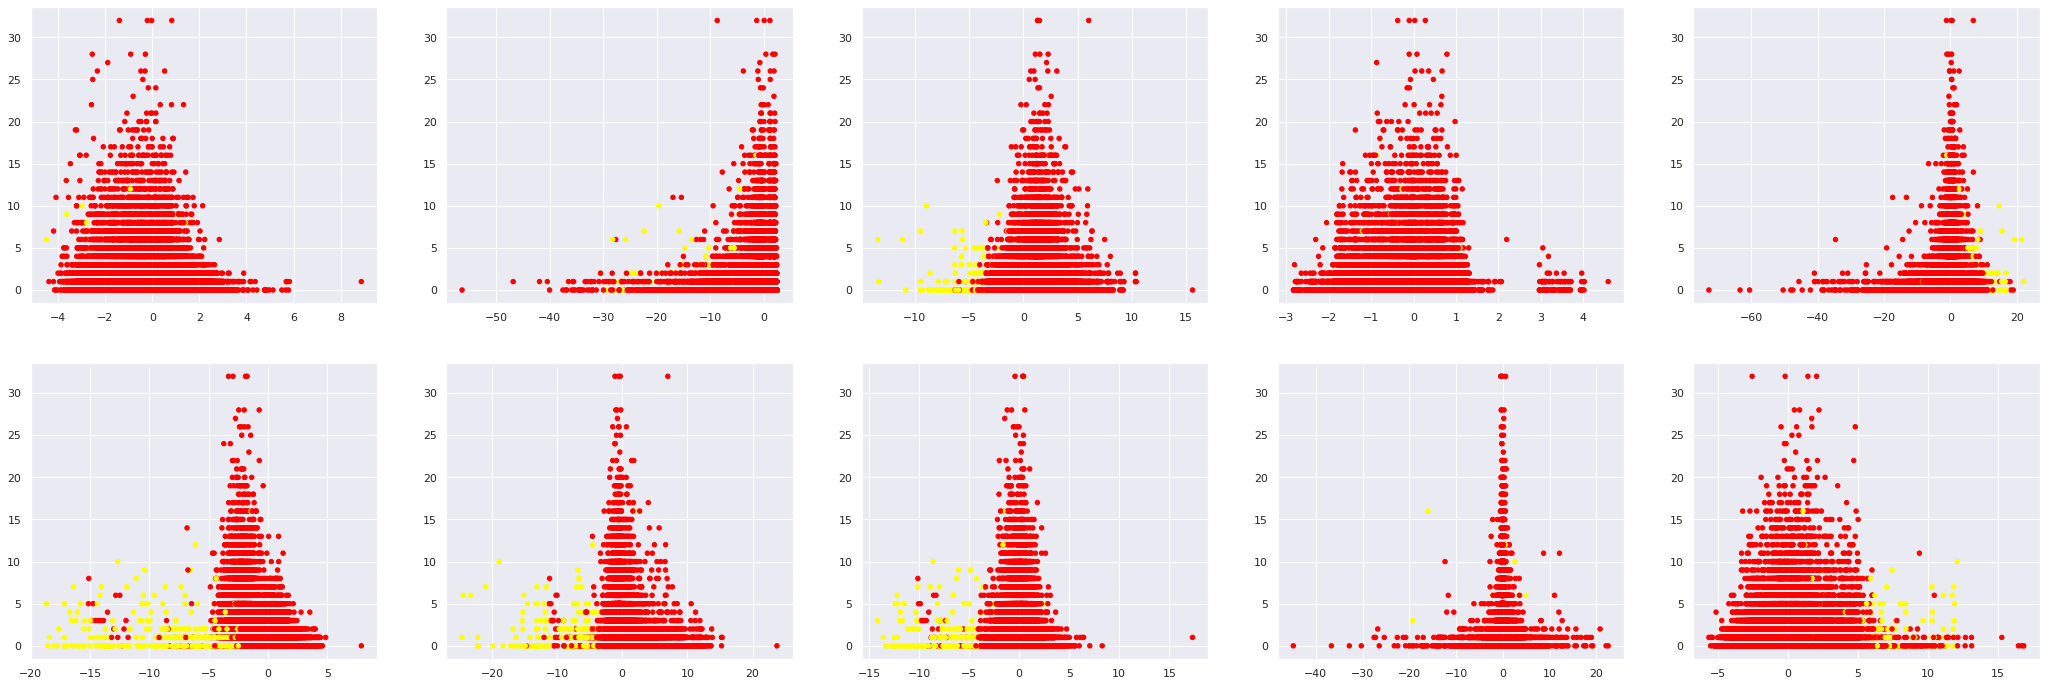

In [ ]:
from itertools import product
from random  import randrange

comb2=list(product(data_test.keys()[1:29],data_test.keys()[31:32]))

sample2=list()
for i in [randrange(0,29) for i in range(0,10)] : 
  sample2.append(comb2[i])

fig, ax= plt.subplots(2,5, figsize=(36,12))
ax_n=list(product(range(0,2),range(0,5)))
n=0

for i, j in sample2 : 
  ax[ax_n[n][0]][ax_n[n][1]].scatter(data_test[i], data_test[j], c=data_test['Class'], s=20, cmap='autumn')  # 다른 색상을 이용하고 싶으시면 cmap='Blues'를 사용해 보세요
  n+=1

In [ ]:
# 1초 내 거래 추출

data_test1=data_test[data_test['time_lag']<=1]
print('총 거래수 :',format(len(data_test1),','))
print('줄어든 비율 :', str(round(-(len(data_test1)-len(data2))/len(data2),3)*100)+'%')
print('이상거래 개수 :',sum(data_test1['Class']==1))
print('이상거래 비율 :',str(round(sum(data_test1['Class']==1)/len(data_test1),3)*100)+'%')

# data_test1은 데이터 처리를 통해 8.6% 줄어들었다.

총 거래수 : 260,274
줄어든 비율 : 8.6%
이상거래 개수 : 391
이상거래 비율 : 0.2%


In [ ]:
data_test1 = data_test1.drop(['time_lag','Time'], axis = 1)
y_test1 = data_test1['Class']
X_test1 = data_test1.drop(['Class'], axis = 1)

from sklearn.model_selection import train_test_split
X_test1_train, X_test1_test, y_test1_train, y_test1_test = train_test_split(X_test1, y_test1, test_size = 0.3, random_state = 0)

X_test1_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
139241,-0.352537,0.814032,1.896541,-0.112252,0.085684,-0.615585,0.908804,-0.224275,-0.707432,-0.153383,1.568041,0.714351,0.111651,0.154738,0.100015,0.228084,-0.688305,0.050345,0.279183,0.079044,-0.127614,-0.293478,-0.006092,0.526652,-0.532368,-0.037013,-0.084860,-0.095632,-0.285302
189811,0.733877,0.245075,-2.114929,1.318430,0.432109,-0.217793,-0.123121,-2.942726,-0.788962,-0.052734,0.250396,0.300632,-1.324050,1.716389,-0.203614,-0.072687,-0.474383,0.531285,0.384713,0.824693,-0.964774,0.815872,-0.135228,-0.516711,0.242965,-0.436184,0.022461,0.174982,0.482491
25943,1.315404,-0.033577,-1.089984,-0.557087,2.029931,3.268130,-0.534994,0.808250,-0.052724,0.001149,-0.028609,0.073657,0.041285,0.425500,1.245277,0.640368,-0.910237,-0.068698,0.255268,0.016952,-0.313307,-1.068934,0.103797,0.992126,0.369398,0.110374,-0.028302,0.011836,-0.345313
143898,-0.968517,0.554083,2.184338,1.900695,-0.704626,0.349753,-0.473487,0.762516,0.333647,-0.809812,-0.858099,1.032810,-0.168635,-0.419426,-1.481790,-1.676520,1.504076,-1.193915,1.088653,-0.065084,-0.196575,-0.299406,0.098920,0.614220,-0.438157,-0.471625,0.121245,0.049119,-0.321804
188064,-1.143932,-0.457957,-0.027864,-1.974106,-1.628144,1.219072,1.430552,-1.345536,-0.163996,0.657630,-0.025602,-0.894055,-1.042722,-0.641515,-1.311411,1.430214,-0.329759,-0.996146,1.273996,-1.003842,0.386188,-0.446723,0.225326,-0.822315,-1.163430,-0.722819,0.009010,-0.125830,1.228054


In [ ]:
# 모형 생성

model = Sequential([
Dense(input_dim = 29, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'relu')])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_test1_train, y_test1_train, batch_size = 36, epochs = 5)

score=model.evaluate(X_test1_test, y_test1_test)


decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_test1_train, y_test1_train)
y_pred_test1_dt = decision_tree_model.predict(X_test1_test)


rf_model = RandomForestClassifier(n_estimators=100) 
rf_model.fit(X_test1_train, y_test1_train)
y_pred_rf = rf_model.predict(X_test1_test)

Epoch 1/5
5061/5061 [==============================] - 7s 1ms/step - loss: 0.0132 - accuracy: 0.9990
Epoch 2/5
5061/5061 [==============================] - 7s 1ms/step - loss: 0.0083 - accuracy: 0.9994
Epoch 3/5
5061/5061 [==============================] - 7s 1ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 4/5
5061/5061 [==============================] - 7s 1ms/step - loss: 0.0084 - accuracy: 0.9994
Epoch 5/5
2441/2441 [==============================] - 2s 886us/step - loss: 0.0098 - accuracy: 0.9994


In [ ]:
# 예측력

print('랜덤포레스트 :',sum(y_test1_test==y_pred_rf)/len(y_test1_test),
      '\n'+'DNN :', score[1],'\n'+
      '결정트리 :',sum(y_test1_test==y_pred_test1_dt)/len(y_test1_test))  ##%소수 둘 쨰자리까지

랜덤포레스트 : 0.9995133383707081 
DNN : 0.999359667301178 
결정트리 : 0.9994108832908571


In [ ]:
# 오차 분석

y_test_dnn=np.array(y_test1_test).reshape(-1,1)
y_temp_dnn=y_test_dnn[model.predict(X_test1_test)!=np.array(y_test1_test).reshape(-1,1)]

res1_list=[len(y_test1_test[y_test1_test!=i]) for i in [y_pred_test1_dt, y_pred_rf]]
res1_list.append(len(y_temp_dnn))
res2_list=[sum(y_test1_test[y_test1_test!=i]==1) for i in [y_pred_test1_dt, y_pred_rf]]
res2_list.append(len(y_temp_dnn==1))
res3_list=[round(sum(y_test1_test[y_test1_test!=i]==1)/len(y_test1_test[y_test1_test!=i]),4)*100for i in [y_pred_test1_dt, y_pred_rf]]
res3_list.append(round(len(y_temp_dnn==1)/len(y_temp_dnn),4)*100)


res_difference=pd.DataFrame({'# of 예측 오차' : res1_list,'# of 오차 중 이상거래' : res2_list,'오차 중 이상거래 비율(%)' : res3_list}, index=['결정트리','랜덤포레스트','DNN'])
res_difference

# 결정트리 결과가 더 악화되는 현상이 나타난다.

,# of 예측 오차,# of 오차 중 이상거래,오차 중 이상거래 비율(%)
결정트리,46,38,82.61
랜덤포레스트,38,32,84.21
DNN,141,141,100.00


In [ ]:
# 0초 데이터 추출

data_test0=data_test[data_test['time_lag']<=0]
print('총 거래수 :',format(len(data_test0),','))
print('줄어든 비율 :', str(round(-(len(data_test0)-len(data_test))/len(data_test),3)*100)+'%')
print('이상거래 개수 :',sum(data_test0['Class']==1))
print('이상거래 비율 :',str(round(sum(data_test0['Class']==1)/len(data_test0),3)*100)+'%')


총 거래수 : 160,215
줄어든 비율 : 43.7%
이상거래 개수 : 248
이상거래 비율 : 0.2%


In [ ]:
data_test0 = data_test0.drop(['time_lag','Time'], axis = 1)
y_test0 = data_test0['Class']
X_test0 = data_test0.drop(['Class'], axis = 1)

from sklearn.model_selection import train_test_split
X_test0_train, X_test0_test, y_test0_train, y_test0_test = train_test_split(X_test0, y_test0, test_size = 0.3, random_state = 0)

X_test0_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
104156,-2.077144,0.270668,-0.386041,-3.442054,0.628897,4.435670,-3.636753,-3.816134,-3.070592,-0.507386,-0.821339,-0.748448,0.060989,0.616807,0.271130,0.813166,0.092986,0.965331,-0.878067,0.871715,-2.570551,0.771562,0.218419,0.953035,0.424740,-0.195967,-0.023154,-0.076581,-0.301254
103691,1.069242,0.306365,1.045056,2.802485,-0.615553,-0.390802,-0.036436,0.004196,-0.206346,0.527658,-0.702100,-0.057603,-0.807656,0.048831,-0.581816,0.215196,-0.081434,-0.700213,-0.711554,-0.160361,-0.256926,-0.735320,0.106218,0.663376,0.297890,-0.200996,-0.000764,0.033936,-0.208139
127989,1.212024,-0.394934,0.658150,-0.283512,-0.533945,0.456695,-0.701185,0.181683,0.644905,-0.204047,0.288487,1.137920,1.130128,-0.373774,0.033344,0.854885,-0.955936,0.518735,0.793473,0.105609,-0.059430,-0.086915,-0.132494,-0.739727,0.232124,1.048251,-0.042342,0.001900,-0.209298
157539,2.028439,-0.009055,-1.276159,0.281909,0.290616,-0.509999,-0.077936,-0.177117,1.848010,-0.294653,1.916649,-1.755276,1.096369,2.214981,-0.438992,-0.148579,0.035853,0.836206,-0.186337,-0.299109,0.169294,0.828758,0.032347,0.653672,0.259925,-0.506789,-0.026988,-0.064581,-0.349231
171830,1.968808,0.567574,-2.150139,1.479389,0.847584,-0.895213,0.380771,-0.183443,0.244382,-0.694790,-0.232273,-0.382523,-0.536709,-1.780132,0.652286,0.733972,1.274751,0.514778,-0.650524,-0.165824,-0.361074,-1.032240,0.279658,0.321827,-0.094958,-0.944798,0.027039,0.016592,-0.255316


In [ ]:
# 모형 생성

model = Sequential([
Dense(input_dim = 29, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'relu')])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_test0_train, y_test0_train, batch_size = 36, epochs = 5)

score=model.evaluate(X_test0_test, y_test0_test)


decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_test0_train, y_test0_train)
y_pred_test0_dt = decision_tree_model.predict(X_test0_test)


rf_model = RandomForestClassifier(n_estimators=100) 
rf_model.fit(X_test0_train, y_test0_train)
y_pred_rf = rf_model.predict(X_test0_test)

Epoch 1/5
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0269 - accuracy: 0.9983
Epoch 2/5
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0269 - accuracy: 0.9983
Epoch 3/5
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0269 - accuracy: 0.9983
Epoch 4/5
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0269 - accuracy: 0.9983
Epoch 5/5
2652/2652 [==============================] - 2s 890us/step - loss: 0.0233 - accuracy: 0.9985


In [ ]:
# 예측력

print('랜덤포레스트 :',sum(y_test0_test==y_pred_rf)/len(y_test0_test),
      '\n'+'DNN :', score[1],'\n'+
      '결정트리 :',sum(y_test0_test==y_pred_test0_dt)/len(y_test0_test))  ##%소수 둘 쨰자리까지

랜덤포레스트 : 0.9995049855031469 
DNN : 0.9984914064407349 
결정트리 : 0.9993517667303113


In [ ]:
# 오차 분석

y_test_dnn=np.array(y_test0_test).reshape(-1,1)
y_temp_dnn=y_test_dnn[model.predict(X_test0_test)!=np.array(y_test0_test).reshape(-1,1)]

res1_list=[len(y_test0_test[y_test0_test!=i]) for i in [y_pred_test0_dt, y_pred_rf]]
res1_list.append(len(y_temp_dnn))
res2_list=[sum(y_test0_test[y_test0_test!=i]==1) for i in [y_pred_test0_dt, y_pred_rf]]
res2_list.append(len(y_temp_dnn==1))
res3_list=[round(sum(y_test0_test[y_test0_test!=i]==1)/len(y_test0_test[y_test0_test!=i]),4)*100for i in [y_pred_test0_dt, y_pred_rf]]
res3_list.append(round(len(y_temp_dnn==1)/len(y_temp_dnn),4)*100)


res_difference=pd.DataFrame({'# of 예측 오차' : res1_list,'# of 오차 중 이상거래' : res2_list,'오차 중 이상거래 비율(%)' : res3_list}, index=['결정트리','랜덤포레스트','DNN'])
res_difference

# 0초 단위로 잘랐을 때 데이터 크기가 줄어들어 아웃라이어에 따른 편향성이 1초 데이터보다 작아지게 된다.
# 결정트리는 time feature로 전처리 안한 경우가 더 낫고 랜덤포레스트는 개선된다.

,# of 예측 오차,# of 오차 중 이상거래,오차 중 이상거래 비율(%)
결정트리,20,15,75.00
랜덤포레스트,17,13,76.47
DNN,60,60,100.00


# 결론

데이터 내에서 이상거래가 차지하는 비중이 0.2%로 매우 미미하며 아웃라이어의 특징을 띠고 있기에 이상거래와 같이 아웃라이어를 선별하고자 기계학습을 활용하는 경우 오차 내에서 아웃라이어로의 편향성이 큰 문제가 될 수 있다. 이를 완화하기 위해서는 위의 연구 결과처럼 현실적인 가정 혹은 직관을 활용하여 데이터를 가공해 활용할 필요가 있음을 알 수 있다. 그러나 데이터를 가공했다고 하여 모든 모형에서 개선된 결과를 얻을 수 있는 것이 아니다는 점은 생각해볼 만한 사실이라 생각한다. 결정트리는 데이터가 가공된 형태에 따라 민감하게 반응했으며 DNN은 편향성이 전혀 개선되지 않았다. 오직 세 모형 중 랜덤포레스트만이 개선된 결과를 보여주었으며 특정한 조건에서 편향성과 예측력이 함께 개선되었다. 그러나 이는 이상거래가 가장 많이 몰려 있는 0초 내 데이터를 활용했을 때에만 나타났기에 이 기준점에 대한 방법론을 찾아 나가는 것이 향후 과제가 되리라 생각한다. 